# 4. Data Modeling: non-artificial neural network models; SVM

LOCAL version for implement scikit-learn ML models

## Environment Setup

In [1]:
# libraries import
import os # miscellaneous operating system interfaces
import numpy as np # Array library for linear algebra
import matplotlib.pyplot as plt # visualization library
from sklearn.svm import SVC # SVM classifier
from sklearn.ensemble import RandomForestClassifier # RFC classifier
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn.metrics import classification_report # evaluators classification report
import scikitplot as skplt # scikit-learn and matplotlib integrated visualization library
import joblib # I/O library for scikit-learn

# system configuration
os.environ["TF_CPP_MIN_LOG_LEVEL"]="0" # disable warning messages
os.environ['AUTOGRAPH_VERBOSITY'] = '0' # set it to 0
random_seed = 20 # random seed

print('\n')
print('necessary libraries has successfully imported')



necessary libraries has successfully imported


## Data Loading

In [2]:
# define path to files
defaultdir = '/Users/pnastra_castcle/navavat.pi@castcle.com - Google Drive/My Drive/all_about_phd_research/'

In [3]:
print('loading processed data')
print('\n')

# load input data from drive
X_train = np.load(defaultdir + '/processed_data/X_train_sk.npy')
X_test = np.load(defaultdir + '/processed_data/X_test_sk.npy')
y_train = np.load(defaultdir + '/processed_data/y_train_sk.npy')
y_test = np.load(defaultdir + '/processed_data/y_test_sk.npy')


print('load data done')
print('\n')

loading processed data


load data done




## SVM model

In [4]:
# define model name
modelName = 'SVM'

print(modelName, 'modeling is initializing')
print('\n')

SVM modeling is initializing




## Data Modeling

In [5]:
# define function to create and training SVM model
def svmModeling(X_train, y_train,
                num_classes, 
                kernel='rbf', 
                gamma='scale', 
                class_weight='balanced', 
                probability=True, 
                verbose=1, 
                max_iter=-1):
  
  svc = SVC(C=num_classes, 
            kernel=kernel, 
            gamma=gamma, 
            class_weight=class_weight, 
            probability=probability, 
            verbose=verbose, 
            max_iter=max_iter)
  
  print(modelName, 'model is successfully constructed')
  print('training', modelName, 'model')

  # perform training
  svmModel = svc.fit(X= X_train, 
                     y= y_train)

  print('training', modelName, 'model has done')

  return svmModel

## Model Training

In [6]:
svmModel = svmModeling(X_train= X_train, y_train= y_train, num_classes= 3)

SVM model is successfully constructed
training SVM model
[LibSVM].*.*
optimization finished, #iter = 16
obj = -13.045491, rho = 0.091558
nSV = 8, nBSV = 3
Total nSV = 8
*.*
optimization finished, #iter = 11
obj = -14.321857, rho = 0.051240
nSV = 8, nBSV = 4
Total nSV = 8
*.*
optimization finished, #iter = 10
obj = -14.805652, rho = 0.057026
nSV = 8, nBSV = 5
Total nSV = 8
*.*
optimization finished, #iter = 10
obj = -11.996631, rho = 0.073911
nSV = 8, nBSV = 4
Total nSV = 8
.*.*
optimization finished, #iter = 16
obj = -13.158885, rho = 0.123035
nSV = 8, nBSV = 2
Total nSV = 8
.*
optimization finished, #iter = 12
obj = -17.364214, rho = -0.089501
nSV = 10, nBSV = 6
.*.*
optimization finished, #iter = 24
obj = -8.743854, rho = 0.255504
nSV = 10, nBSV = 2
Total nSV = 10
.*
optimization finished, #iter = 16
obj = -9.571314, rho = 0.208954
nSV = 10, nBSV = 2
Total nSV = 10
.*
optimization finished, #iter = 16
obj = -9.853827, rho = 0.241285
nSV = 9, nBSV = 1
Total nSV = 9
.*
optimization fin

## Model Prediction

In [23]:
# making predictions
print(modelName, 'model making prediction')
print('\n')

y_pred = svmModel.predict(X_test)
y_probas = svmModel.predict_proba(X_test)

print('\n')
print(modelName, 'model making prediction has done')
print('\n')

SVM model making prediction




SVM model making prediction has done




# Model Evaluation

In [9]:
print(modelName, 'model evaluation is now processing')
print('\n')

SVM model evaluation is now processing




## Confusion matrix and AUC-ROC curve

In [13]:
# def plot confusion matrix function
def plotConfusionMatrix(y_test=y_test, 
                        y_pred=y_pred, 
                        cmap=plt.cm.Reds, 
                        title='Confusion Matrix of {} model'.format(modelName)):

  # set font sizes
  SMALL_SIZE = 12
  MEDIUM_SIZE = 15
  BIGGER_SIZE = 20

  skplt.metrics.plot_confusion_matrix(y_true=y_test, 
                                      y_pred=y_pred, 
                                      title=title, 
                                      normalize='true', 
                                      figsize=(9,9), 
                                      cmap=cmap, 
                                      title_fontsize= BIGGER_SIZE, 
                                      text_fontsize= BIGGER_SIZE
                                      )

  # save figure
  plt.savefig(defaultdir + '/processed_data/' + title + '.png')

confusion matrix plot




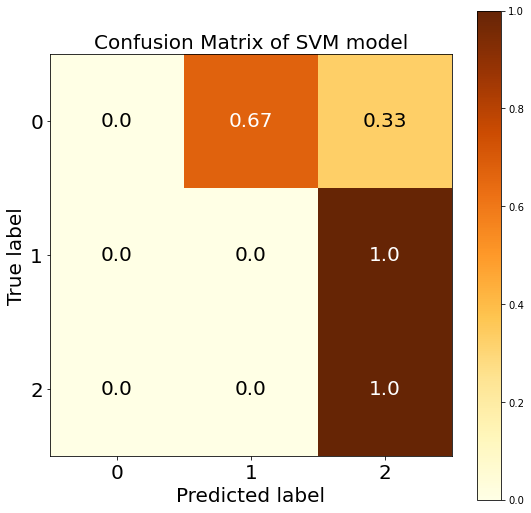

In [17]:
print('confusion matrix plot')
print('\n')

# perform plot confusion matrix function
title = 'Confusion Matrix of {} model'.format(modelName)
plot = plotConfusionMatrix(y_test=y_test, y_pred=y_pred, cmap=plt.cm.YlOrBr, title=title)

In [25]:
# def plot ROC curve function
def plotROC(y_test=y_test, y_pred=y_pred, cmap=plt.cm.Reds, title='ROC curve of {} model'.format(modelName)):

  # set font sizes
  SMALL_SIZE = 12
  MEDIUM_SIZE = 15
  BIGGER_SIZE = 20

  skplt.metrics.plot_roc(y_true=y_test, 
                         y_probas=y_probas, 
                         title=title, 
                         plot_micro=True, 
                         plot_macro=True, 
                         figsize=(12,6), 
                         cmap=cmap, 
                         title_fontsize= BIGGER_SIZE, 
                         text_fontsize= MEDIUM_SIZE
                         )

  # save figure
  plt.savefig(defaultdir + '/processed_data/' + title + '.png')

In [ ]:
print('AUC-ROC curve plot')
print('\n')

# perform plot AUC-ROC curve function
title = 'AUC-ROC curve of {} model'.format(modelName)
plot = plotROC(y_test=y_test, y_pred=y_pred, cmap=plt.cm.YlOrBr, title=title)

## Print Classification Report

In [28]:
# classification report
num_classes = 3
class_list = ['class '+ str(y_class) for y_class in range(num_classes)]

print('classification report of {} model'.format(modelName))
print('\n')
print(classification_report(y_test, 
                            y_pred, 
                            target_names= class_list))

print('\n')

classification report of SVM model


              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00         3
     class 1       0.00      0.00      0.00         1
     class 2       0.50      1.00      0.67         2

    accuracy                           0.33         6
   macro avg       0.17      0.33      0.22         6
weighted avg       0.17      0.33      0.22         6





/Users/pnastra_castcle/miniforge3/envs/tfm1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pnastra_castcle/miniforge3/envs/tfm1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pnastra_castcle/miniforge3/envs/tfm1/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## Saving model

In [40]:
# define saving function
def save_model (model, model_name):
    
    filename = defaultdir + '/processed_data/' + model_name + '.joblib'
        
    joblib.dump(model, filename)

    print("Saved {} to drive".format(model_name))

In [41]:
# perform saving
save_model(model=svmModel, model_name= modelName.lower() + 'Model')

Saved svmModel to drive


## Load the saved model

In [49]:
# define loading function
def load_model (model_name):

    filename = defaultdir + '/processed_data/' + model_name + '.joblib'
    
    loaded_model = joblib.load(filename)
    
    return loaded_model

In [50]:
# perform loading
cnnModel = load_model(model_name= modelName.lower() + 'Model')

## Perform testing loaded model

In [55]:
# making prediction of loaded model
svmModel.predict(X_test)

array([1, 1, 2, 2, 2, 2])

In [56]:
print('\n')
print(modelName, 'modeling process is completed')



SVM modeling process is completed


# Finish Data life cycle